In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import datetime
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('data/doc2vec.csv')
data

,id,text,create_at,geo,retweet_count,like_count,hashtags,username,following,followers,...,0,1,2,3,4,5,6,7,8,9
0,1591219215352336384.0,'Like a 1930s Dictator': Vitalik Buterin Lays ...,2022-11-11 23:59:59+00:00,"For now, Earth",0.0,1.0,#ftx,johnmorganFL,630.0,28492.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
1,1591219209123823616.0,"💸 $1,000 #Giveaway 💸\n\nWe'll select 10 winner...",2022-11-11 23:59:57+00:00,Panama,8866.0,0.0,#ftx,KuKzNFT,594.0,1014.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
2,1591219200546443264.0,#FTX crazy Shit! #Crypto https://t.co/2GO4X3u2pt,2022-11-11 23:59:55+00:00,"Seattle, WA",0.0,0.0,#ftx,MeAndMySports,315.0,342.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
3,1591219193537769472.0,"Yo @SBF_FTX, draw me like one of your French g...",2022-11-11 23:59:53+00:00,"London, England",0.0,0.0,#ftx,thedoc7er,1513.0,296.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
4,1591219183660199936.0,@BitcoinMagazine you you simpletons cant under...,2022-11-11 23:59:51+00:00,NaN,0.0,1.0,#ftx,jesseypaul4,123.0,44.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178156,1591564543502827520.0,"🔴 WAR IN 🇺🇦: FRANCE 24 reporter @cntrentF24, w...",2022-11-12 22:52:11+00:00,Hauts de France 🇫🇷 🇪🇺,20.0,0.0,#ukraine,annetteashley61,10522.0,9603.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
178157,1591564535986794496.0,People still celebrating in Kherson and I love...,2022-11-12 22:52:09+00:00,"Belgrade, Serbia, Europe",1041.0,0.0,#ukraine,svrhovac,222.0,150.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
178158,1591564513710862336.0,A remarkable story #Ukraine https://t.co/eeBLc...,2022-11-12 22:52:04+00:00,Guernsey,0.0,0.0,#ukraine,TimBarker10,2668.0,1217.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562
178159,1591564504680509440.0,#Ukraine: Relief in liberated #Kherson after 8...,2022-11-12 22:52:02+00:00,🇮🇪🇪🇺🇺🇦🎮,189.0,0.0,#ukraine,Aontaithe2021,5001.0,2376.0,...,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562


In [3]:
data.columns

Index(['id', 'text', 'create_at', 'geo', 'retweet_count', 'like_count',
       'hashtags', 'username', 'following', 'followers', 'user_total_tweets',
       'user_likes_count', 'cleaned_text', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9'],
      dtype='object')

In [4]:
data['hashtags'].value_counts()

#ukraine          23400
#covid            23400
#christmas        23090
#vegan            23051
#climatechange    22489
#ftx              22274
ShopParaTi            1
22.0                  1
Name: hashtags, dtype: int64

# Preprocessing

### 1. remove tag shopParaTi and 22.0

In [5]:
data = data[(data['hashtags']!='ShopParaTi') & (data['hashtags']!='22.0')]
data['hashtags'].value_counts()

#ukraine          23400
#covid            23400
#christmas        23090
#vegan            23051
#climatechange    22489
#ftx              22274
Name: hashtags, dtype: int64

### 2. one-hot encoding hashtags

In [6]:
data = pd.get_dummies(data=data, columns=['hashtags'])
data.columns

Index(['id', 'text', 'create_at', 'geo', 'retweet_count', 'like_count',
       'username', 'following', 'followers', 'user_total_tweets',
       'user_likes_count', 'cleaned_text', '0', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', 'hashtags_#christmas', 'hashtags_#climatechange',
       'hashtags_#covid', 'hashtags_#ftx', 'hashtags_#ukraine',
       'hashtags_#vegan'],
      dtype='object')

### 3. get useful columns

In [7]:
useful_columns = [
    'following',
    'followers', 
    'user_total_tweets',
    'user_likes_count', 
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
    'hashtags_#christmas', 
    'hashtags_#climatechange',
    'hashtags_#covid', 
    'hashtags_#ftx', 
    'hashtags_#ukraine',
    'hashtags_#vegan',
    'retweet_count', 
    'like_count'
]

all_features = [
    'following',
    'followers', 
    'user_total_tweets',
    'user_likes_count', 
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
    'hashtags_#christmas', 
    'hashtags_#climatechange',
    'hashtags_#covid', 
    'hashtags_#ftx', 
    'hashtags_#ukraine',
    'hashtags_#vegan'
]
data = data[useful_columns]

### 4. remove NaN and transform data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178159 entries, 0 to 178160
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   following                137704 non-null  float64
 1   followers                137704 non-null  object 
 2   user_total_tweets        137704 non-null  float64
 3   user_likes_count         137704 non-null  object 
 4   0                        137704 non-null  float64
 5   1                        137704 non-null  float64
 6   2                        137704 non-null  float64
 7   3                        137704 non-null  float64
 8   4                        137704 non-null  float64
 9   5                        137704 non-null  float64
 10  6                        137704 non-null  float64
 11  7                        137704 non-null  float64
 12  8                        137704 non-null  float64
 13  9                        137704 non-null  float64
 14  hash

In [9]:
data.dropna(inplace=True)

In [10]:
data[['retweet_count','like_count','following','followers','user_total_tweets','user_likes_count']] = data[['retweet_count','like_count','following','followers','user_total_tweets','user_likes_count']].astype('float')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137704 entries, 0 to 178160
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   following                137704 non-null  float64
 1   followers                137704 non-null  float64
 2   user_total_tweets        137704 non-null  float64
 3   user_likes_count         137704 non-null  float64
 4   0                        137704 non-null  float64
 5   1                        137704 non-null  float64
 6   2                        137704 non-null  float64
 7   3                        137704 non-null  float64
 8   4                        137704 non-null  float64
 9   5                        137704 non-null  float64
 10  6                        137704 non-null  float64
 11  7                        137704 non-null  float64
 12  8                        137704 non-null  float64
 13  9                        137704 non-null  float64
 14  hash

### 5. deal with probelms of 0 count and skewed data

In [12]:
# remove zero likes
data = data[data['like_count']!=0]
data = data[data['retweet_count']!=0]

# not remove zero likes



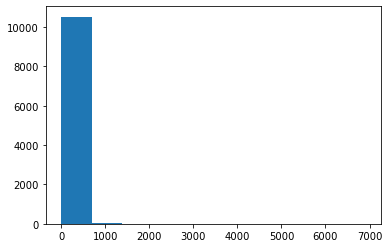

In [13]:
plt.hist(data['like_count'])
plt.show()

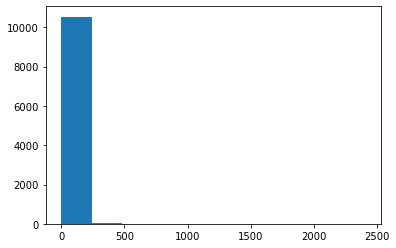

In [14]:
plt.hist(data['retweet_count'])
plt.show()

In [15]:
## Find the skew of the check-outs

data['like_count'].skew()

24.120874395805302

In [16]:
## Check skew of multiple transformations

log_trans = np.log(data['like_count']).skew()
sqrt_trans = (data['like_count'] ** .5).skew()
cube_trans = (data['like_count']** (1/3)).skew()

print('Log Transformation:', log_trans)
print('Square Root Transformation:', sqrt_trans)
print('Cube Root Transformation', cube_trans)

Log Transformation: 1.107285324290662
Square Root Transformation: 6.541384843549768
Cube Root Transformation 3.758569060031114


In [17]:
## Transform the check-out values

data['like_count(log)']=  np.log(data['like_count'])
data['retweet_count(log)']=  np.log(data['retweet_count'])

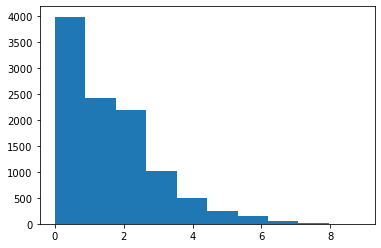

In [18]:
plt.hist(data['like_count(log)'])
plt.show()

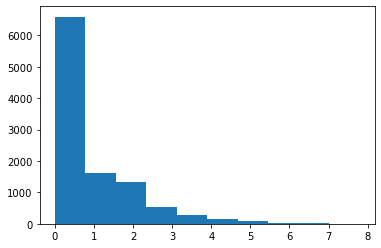

In [19]:
plt.hist(data['retweet_count(log)'])
plt.show()

# Models

In [20]:
def knn(X_train, X_dev, y_train, y_dev):
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_dev)
    knn_mse = mean_squared_error(y_dev, prediction)
    knn_r2 = r2_score(y_dev, prediction)
    return knn_mse, knn_r2


def svr(X_train, X_dev, y_train, y_dev):
    svr = SVR()
    svr.fit(X_train, y_train)
    prediction = svr.predict(X_dev)
    svc_mse = mean_squared_error(y_dev, prediction)
    svr_r2 = r2_score(y_dev, prediction)
    return svc_mse, svr_r2

# XGBRegressor
def xgbr(X_train, X_dev, y_train, y_dev):
    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', random_state=0, n_estimators = 50)
    xg_reg.fit(X_train,y_train)
    xg_preds = xg_reg.predict(X_dev)
    xg_mse = mean_squared_error(y_dev, xg_preds)
    xg_r2 = r2_score(y_dev, xg_preds)
    
#     # Mean Squared Error
#     xg_mse = mean_squared_error(np.e ** y_dev, np.e ** xg_preds)

#     # r2 score
#     xg_r2 = r2_score(np.e ** y_dev, np.e ** xg_preds)

    return xg_mse, xg_r2

# GradientBoostingRegressor
def gbr(X_train, X_dev, y_train, y_dev):
    gra_reg = GradientBoostingRegressor(random_state=0, n_estimators = 50)
    gra_reg.fit(X_train,y_train)
    gra_preds = gra_reg.predict(X_dev)
    gra_mse = mean_squared_error(y_dev, gra_preds)
    gra_r2 = r2_score(y_dev, gra_preds)
    return gra_mse, gra_r2

# AdaBoostRegressor
def ada(X_train, X_dev, y_train, y_dev):
    ada_reg = AdaBoostRegressor(random_state=0, n_estimators = 50)
    ada_reg.fit(X_train,y_train)
    ada_preds = ada_reg.predict(X_dev)
    ada_mse = mean_squared_error(y_dev, ada_preds)
    ada_r2 = r2_score(y_dev, ada_preds)
    return ada_mse, ada_r2

def lasso(X_train, X_dev, y_train, y_dev):
   
    lasso = Lasso()
    lasso.fit(X_train, y_train)
    prediction = lasso.predict(X_dev)
    lasso_mse = mean_squared_error(y_dev.values, prediction)
    lasso_r2 = r2_score(y_dev, prediction)
    return lasso_mse, lasso_r2

def ridge(X_train, X_dev, y_train, y_dev):
   
    ridge = Ridge()
    ridge.fit(X_train, y_train)
    prediction = ridge.predict(X_dev)
    ridge_mse = mean_squared_error(y_dev, prediction)
    ridge_r2 = r2_score(y_dev, prediction)
    return ridge_mse, ridge_r2


# Linear regression
def linreg(X_train, X_dev, y_train, y_dev):
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    prediction = linreg.predict(X_dev)
    linreg_mse = mean_squared_error(y_dev, prediction)
    linreg_r2 = r2_score(y_dev, prediction)
    
    # Mean Squared Error
    lm_mse = mean_squared_error(np.e ** y_dev, np.e ** prediction)

    # r2 score
    lm_r2 = r2_score(np.e ** y_dev, np.e ** prediction)
    
#     return linreg_mse, linreg_r2
    return lm_mse, lm_r2


# Random Forests
def rf(X_train, X_dev, y_train, y_dev):
    rf = RandomForestRegressor(random_state=0)
    rf.fit(X_train,y_train)
    prediction = rf.predict(X_dev)
    rf_mse = mean_squared_error(y_dev, prediction)
    rf_r2 = r2_score(y_dev, prediction)
    
    
    # Mean Squared Error
#     rf_mse = mean_squared_error(np.e ** y_dev, np.e ** prediction)

#     # r2 score
#     rf_r2 = r2_score(np.e ** y_dev, np.e ** prediction)
    
    return rf_mse, rf_r2
    

In [21]:
features = data[all_features]
features.head(1)

,following,followers,user_total_tweets,user_likes_count,0,1,2,3,4,5,6,7,8,9,hashtags_#christmas,hashtags_#climatechange,hashtags_#covid,hashtags_#ftx,hashtags_#ukraine,hashtags_#vegan
84,418.0,3560.0,12428.0,47270.0,0.010382,-0.08424,-0.039559,0.184624,-0.086596,0.021903,-0.159313,-0.267359,-0.064923,-0.057562,0,0,0,1,0,0


In [22]:
labels = data['like_count(log)']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [24]:
lm_mse, lm_r2 = linreg(X_train, X_test, y_train, y_test)
print('Mean Squared Error =', lm_mse)
print('r2 =', lm_r2)


Mean Squared Error = 9302.491881491784
r2 = -0.0232419434239588


In [26]:
rf_mse, rf_r2 = rf(X_train, X_test, y_train, y_test)

print('Mean Squared Error =', rf_mse)
print('r2 =', rf_r2)

Mean Squared Error = 1.0860629504539665
r2 = 0.4476994091505172


In [27]:
xg_mse, xg_r2 = xgbr(X_train, X_test, y_train, y_test)

print('Mean Squared Error =', xg_mse)
print('r2 =', xg_r2)

Mean Squared Error = 1.1154101567190522
r2 = 0.43277533927665446


### Error Analysis of the Random Forest

In [28]:
import plotly as py
import plotly.offline as pyo
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
from plotly.tools import FigureFactory as FF

In [30]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
prediction = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, prediction)
rf_r2 = r2_score(y_test, prediction)

test = pd.DataFrame()
test['like_count'] = np.e ** y_test
test['Predictions'] = np.e ** prediction
test['Difference'] = test['Predictions'] - test['like_count']

test['text'] = test.apply(lambda x: 'Predicted Difference: ' + str(round(x['Difference'], 2)), axis=1)

    
## Plotly scatter plot comparing the actual vs predicted values
error_trace = {'type' : 'scatter',
              'x' : test['like_count'],
              'y' : test['Predictions'],
              'text' : test['text'],
              'hoverinfo' : 'text',
              'mode' : 'markers',
              'marker' : {'size' : abs(test['Difference']/2)}}

layout = {'title' : 'Random Forest Error Analysis',
         'xaxis' : {'title' : 'Actual Like Count'},
         'yaxis' : {'title' : 'Predicted Like Count'},
         'hovermode' : 'closest'}

error_analysis = {'data': [error_trace], 'layout' : layout}
# pyo.iplot(error_analysis)


In [31]:
rf.feature_importances_

array([0.14678374, 0.31231333, 0.23777621, 0.20873681, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01008613,
       0.02701628, 0.01100356, 0.01216271, 0.01507734, 0.01904388])

In [32]:

all_features = [
    'following',
    'followers', 
    'user_total_tweets',
    'user_likes_count', 
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
    'hashtags_#christmas', 
    'hashtags_#climatechange',
    'hashtags_#covid', 
    'hashtags_#ftx', 
    'hashtags_#ukraine',
    'hashtags_#vegan'
]